In [1]:
from Crypto.Hash import SHA256 
from Crypto.Cipher import AES
from Crypto.Util.Padding import  pad,unpad
from PIL import Image
import numpy as np

In [ ]:
data = '40131383-40125933'
sha256_hash = SHA256.new(data=data.encode()).hexdigest() 
sha256_hash

'd54fa0c07db7f94eac27a4745a1a545806c501e7fa6b1b8b471b67a8aeb12ca5'

In [3]:
key =  bytes.fromhex(sha256_hash[:int(128/4)])
iv =  bytes.fromhex(sha256_hash[int(128/4):])

In [4]:
img = Image.open("image.png").convert("RGB")
pixels = np.array(img)
original_shape = pixels.shape  
data = pixels.tobytes()
print(original_shape)
img

(224, 224, 3)


In [5]:
ecb_cipher = AES.new(key= key,mode= AES.MODE_ECB)
data_ecb_enc =  ecb_cipher.encrypt(data)

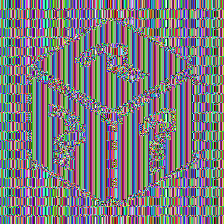

In [6]:
ecb_encrypted_array = np.frombuffer(data_ecb_enc, dtype=np.uint8)
ecb_encrypted_array = ecb_encrypted_array.reshape(original_shape)
ecb_encrypted_img = Image.fromarray(ecb_encrypted_array, mode="RGB")
ecb_encrypted_img.save("image_ecb_encrypted.png")
ecb_encrypted_img

In [7]:
cbc_cipher = AES.new(key=key,mode=AES.MODE_CBC,iv=iv)
data_cbc_enc =  cbc_cipher.encrypt(data)

In [8]:
cbc_encrypted_array = np.frombuffer(data_cbc_enc, dtype=np.uint8).reshape(original_shape)
cbc_encrypted_img = Image.fromarray(cbc_encrypted_array, mode="RGB")
cbc_encrypted_img.save("image_cbc_encrypted.png")
cbc_encrypted_img

In [9]:
data_cbc_dec =  AES.new(key=key,mode=AES.MODE_CBC,iv=iv).decrypt(data_cbc_enc)

In [10]:
cbc_decrypted_array = np.frombuffer(data_cbc_dec, dtype=np.uint8).reshape(original_shape)
cbc_decrypted_img = Image.fromarray(cbc_decrypted_array, mode="RGB")
cbc_decrypted_img.save("image_cbc_decrypted.png")
cbc_decrypted_img

In [11]:
print('Match!') if SHA256.new(data=data).digest() == SHA256.new(data=data_cbc_dec).digest() else print("not match!")

Match!
